# Quantitative Biology and Biophysics (AS.020.674/618)	Spring 2025
## Lab #2
## February 7, 2025

#  Distributions and Approximations

In class, we discussed the binomial distribution, and how if we have a large N, it approximates a continuous distribution that can approximate a Gaussian distribution. We also discussed some useful approximations: Sterlings approximation & the Taylor Expansion. In this lab, you will explore the properties of these distributions and approximations to hopefully gain a better understanding of their properties.

# Libraries you will need

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.optimize import brentq
from tqdm.notebook import tqdm

# Problem 1: Discrete vs. Continuous variables & distributions

When creating vectors, sometimes you need to create vectors of discrete variables (such as number of animals) vs. continuous variables (such as mass). There are two useful functions for doing this:

 ### For discrete values:

`np.arange(start,end_exclusive)`

Example: `np.arange(0,10)` will produce a vector of integers from 0 to 9


 ### For continuous values:

`np.linspace(start,end_inclusive)`

Example: `np.linspace(0,10)` will produce a vector of 50 evenly spaced values from 0 to 10. The default number of values is 50, so if you want to specify this for X evenly spaced values, use `np.linspace(0,10, num=X)`.


Let's see how the binomial distribution compares to the Gaussian distribution. For this, we will also use a convenient scipy function `norm.pdf` that you imported above. The inputs are k,mean (µ), and standard deviation (the SQUARE ROOT of the variance you calculated above).

`P = norm.pdf(k, mu, np.sqrt(sigma2))`

**Compare the binomial and Gaussian distributions for `N = 5, 10, 20, 50`, and `p = 0.5`.**

For each N:

1. Calculate the expected mean.
2. Calculate the expected standard deviation.
3. Make a subplot with 4 different panels.
3. Plot the binomial distribution for the span of N. **'k' should be integers.** Use markers ('o') for this plot.
4. Plot the corresponding Gaussian distribution for the span of N as a line. **'k' does not need to be integers.**

## <font color='red'>Student Input Cell: 10 points</font> 

[5, 10, 20, 50]
[2.5, 5.0, 10.0, 25.0]
[np.float64(1.118033988749895), np.float64(1.5811388300841898), np.float64(2.23606797749979), np.float64(3.5355339059327378)]


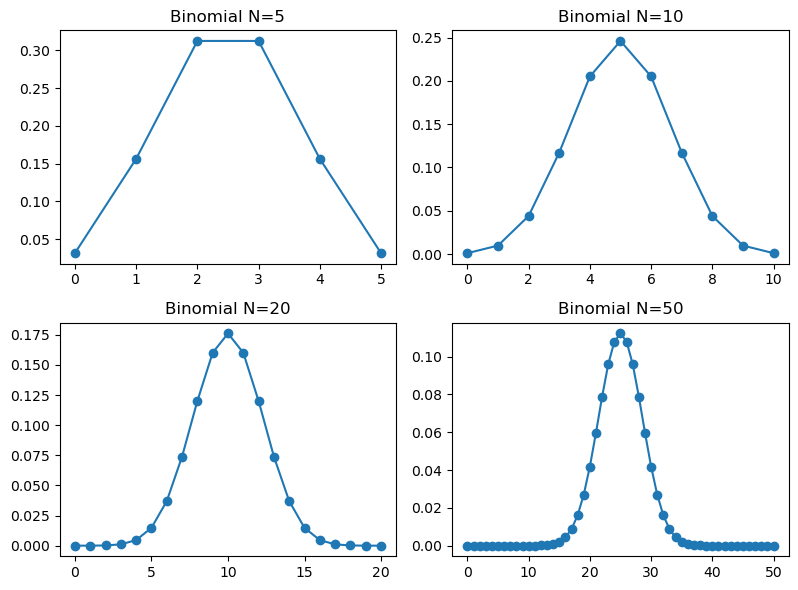

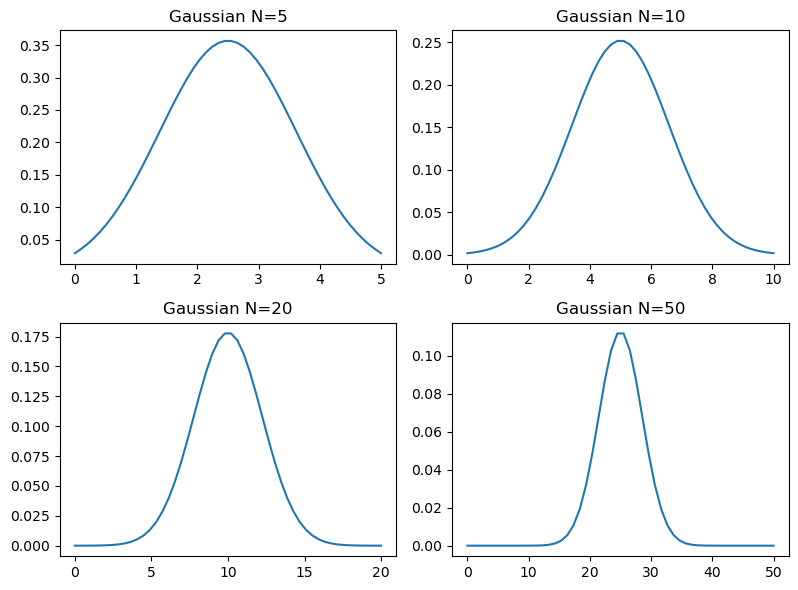

In [ ]:
binom_means = []
binom_sds = []
ns = [5,10,20,50]
p = 0.5

for n in ns:
    binom_means.append(n*p)
    binom_sds.append(np.sqrt(n*p*(1-p)))

print(ns)
print(binom_means)
print(binom_sds)

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs[0,0].plot(np.arange(0,ns[0]+1),binom.pmf(np.arange(0,ns[0]+1),ns[0],p),marker='o')
axs[0,0].set_title('Binomial N=5')
axs[0,1].plot(np.arange(0,ns[1]+1),binom.pmf(np.arange(0,ns[1]+1),ns[1],p),marker='o')
axs[0,1].set_title('Binomial N=10')
axs[1,0].plot(np.arange(0,ns[2]+1),binom.pmf(np.arange(0,ns[2]+1),ns[2],p),marker='o')
axs[1,0].set_title('Binomial N=20')
axs[1,1].plot(np.arange(0,ns[3]+1),binom.pmf(np.arange(0,ns[3]+1),ns[3],p),marker='o')
axs[1,1].set_title('Binomial N=50')
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
axs[0,0].plot(np.linspace(0,5),norm.pdf(np.linspace(0,5),binom_means[0],binom_sds[0]))
axs[0,0].set_title('Gaussian N=5')
axs[0,1].plot(np.linspace(0,10),norm.pdf(np.linspace(0,10),binom_means[1],binom_sds[1]))
axs[0,1].set_title('Gaussian N=10')
axs[1,0].plot(np.linspace(0,20),norm.pdf(np.linspace(0,20),binom_means[2],binom_sds[2]))
axs[1,0].set_title('Gaussian N=20')
axs[1,1].plot(np.linspace(0,50),norm.pdf(np.linspace(0,50),binom_means[3],binom_sds[3]))
axs[1,1].set_title('Gaussian N=50')
plt.tight_layout()
plt.show()

# Problem 2: Taylor Approximation

In class, we discussed the Taylor Approximation of a function. It essentially simplifies a complicated function into a sum of polynomials centered at a point of interest ('a').

<img src="http://www.gordus.org/public_images/taylor1.png" style="width: 3000px;"/>

Biological systems (or any system, really) cannot respond infinitely fast to a stimulus. For example, a protein has a time delay when it binds a molecule, and a time delay when it releases the molecule (the on and off rate). The difference between these rates can be considered the "kernel" that filters the response to the stimulus. Here is an example of a kernel function:

<img src="http://www.gordus.org/public_images/kernel.png" style="width: 200px;"/>

**Let's see what a Taylor Approximation of this function looks like. Please do the following:**

1. Plot the function over the span of 0 to 5.
2. You'll notice it peaks at a certain point. Calculate this point by taking the derivative of the kernel, setting it to 0, and solving for x. This solution will be 'a'.

As a reminder, the derivative of an exponential is:

<img src="http://www.gordus.org/public_images/dxex.png" style="width: 200px;"/>

3. Now calculate an approximation of f(x) centered at 'a' by taking the Taylor Approximation to the 1st derivative.
4. Calculate an approximation centered at 'a' again, but calculate the Taylor approximation up to the second derivative.
5. Plot f(x), and both approximations centered at 'a'. You'll want to set the y limit from 0 to f(a)+0.1 so you can see their relationships better. How good is the approximation near a? Far from it?
6. Re-perform steps 3-5, but now calculate the approximation at b = a + 1.

To make this easier, I advise that you create 3 functions to calculate f(x), the first derivative, and the second derivative.

## <font color='red'>Student Input Cell: 25 points</font> 

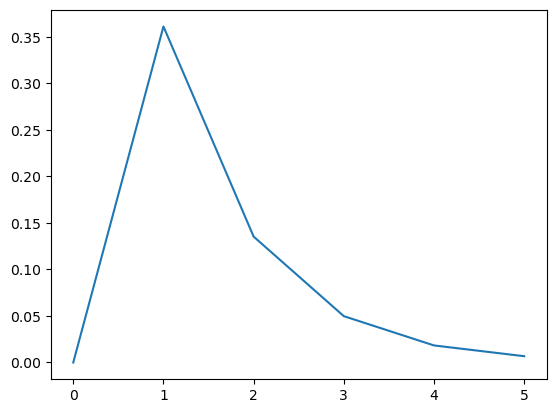

0.5349922439811376
0.5349922439811376


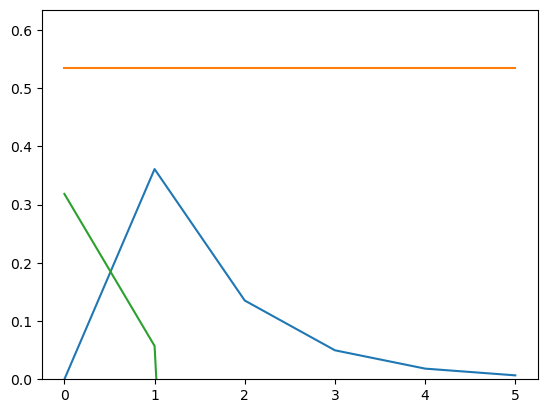

0.24511462233732936
0.24511462233732936


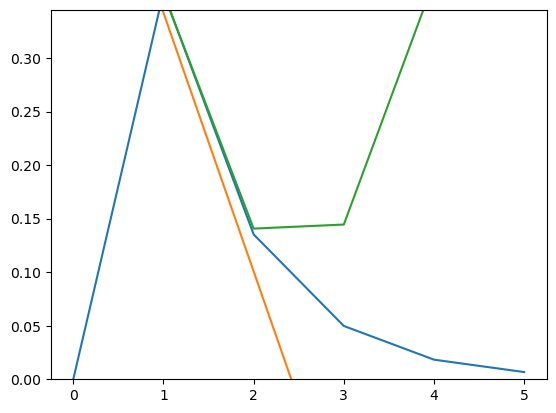

In [ ]:
# Taylor Approximation
x = np.arange(0,6)
# Defined f(x)
def fx(x):
    return np.exp(-x) - np.exp(-5*x)
# Defined d(f(x))
def dfx(x):
    return -np.exp(-x) + 5*np.exp(-5*x)
# Defined d(d(f(x)))
def ddfx(x):
    return np.exp(-x) -25*np.exp(-5*x)
# Plot Function from 0 to 5
plt.plot(x,fx(x))
plt.show()

# Find the root of d(f(x))
a = np.log(5)/4

# Find first Taylor Approx
def fta(x,a):
    return fx(a) + 1/np.prod(np.arange(1,2))*dfx(a)*(x-a)
print(fta(a,a))

# Find second Taylor Approx
def sta(x,a):
    return fx(a) + 1/np.prod(np.arange(1,2))*dfx(a)*(x-a)+ 1/np.prod(np.arange(1,3))*ddfx(a)*(x-a)**2
print(sta(a,a))

# Plot the Three Functions
plt.plot(x,fx(x))
plt.plot(x,fta(x,a))
plt.plot(x,sta(x,a))
plt.ylim(0,fx(a)+0.1)
plt.show()
# The approximation is best near a, and quickly worsens as x goes further and further away from a.

# Repeat 3-5 at b = a + 1
b = a + 1
print(fta(b,b))
print(sta(b,b))
plt.plot(x,fx(x))
plt.plot(x,fta(x,b))
plt.plot(x,sta(x,b))
plt.ylim(0,fx(b)+0.1)
plt.show()


# Problem 3: Plotting Distributions

We want to explore how these data look. To do this we will first plot this data in a variety of ways using seaborn.

1.	Produce a swarm plot of the data. (Since there are 100 data points, I recommend setting the marker size to 2, i.e. `size = 2`
2.	Produce a violin plot of the data.
3.	Produce a box plot of the data.
4.	Produce a bar plot of the data.

Since the data are in an excel file, the easiest thing to do is import the data using pandas.

## <font color='red'>Student Input Cell: 5 points</font> 

In [52]:
# Import data as dataframe
# Data values are the first column of the dataframe, and Data IDs are the second column.

file_path = '/Users/cmdb/Documents/GitHub/qblab2/week2/'

fname  = 'bob_pairing_data_2022.xlsx'
fname = file_path + fname


data_df = pd.read_excel(fname)

## <font color='red'>Student Input Cell: 5 points</font> 

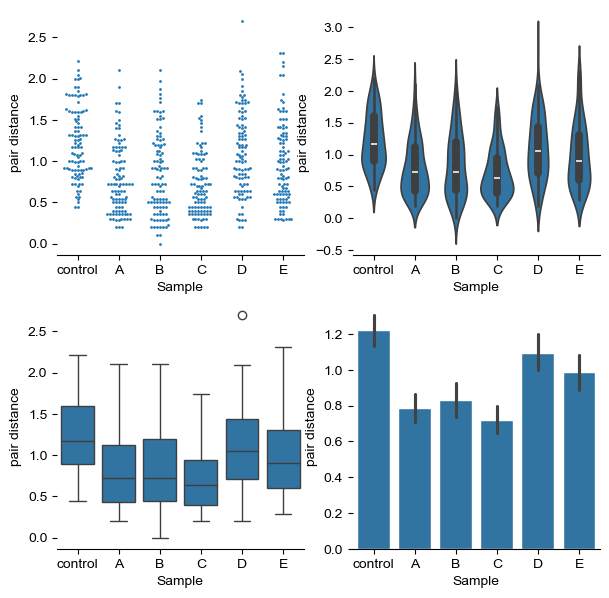

In [53]:
# Plot the 4 seaborn plots
f, axes = plt.subplots(2, 2, figsize=(7, 7))
sns.despine(left=True)
sns.set(style="whitegrid")


sns.swarmplot(x=data_df.columns[1], y=data_df.columns[0], data=data_df,ax=axes[0, 0], size = 2)

sns.violinplot(x=data_df.columns[1], y=data_df.columns[0], data=data_df,ax=axes[0, 1])

sns.boxplot(x=data_df.columns[1], y=data_df.columns[0], data=data_df,ax=axes[1, 0])

sns.barplot(x=data_df.columns[1], y=data_df.columns[0], data=data_df,ax=axes[1, 1])

plt.show()

# Problem 4: Model Selection


## How to do math with arrays

I normally like to work in the realm of arrays, rather than DataFrames. This is because I like to leverage the power and speed of executing linear algebra functions instead of FOR loops. These functions are pre-compiled, so they are much faster. Iteratively going through arrays or DataFrames is computationally exhaustive, and take a long time to run when using large arrays of data.

So, first I make a numpy array where the **rows are observations, and columns are samples.**

In [54]:
#convert dataframe to numpy array
data_n = data_df.to_numpy()
data_n = pd.to_numeric(data_n[:,0])
data_n.resize(6,100)
data_n = np.transpose(data_n)


Next, I can compute the mean and standard deviation for every sample with one command, by setting the axis = 0.

In [55]:
mu = np.nanmean(data_n, axis = 0)
sigma = np.nanstd(data_n, axis = 0)

Isn't that great? Instead of creating a `for` loop and calculating the mean for each column, I simply told the function which axis to use to calculate the mean for the entire array. Both mu and sigma have 6 entries, because I calculated the mean for each column (down the rows, or `axis = 0`). If I had chosen `axis=1`, mu and sigma would be 100 elements long, because I would have calculated the mean and standard deviation of each row.

## Step 1: Gaussian Log Likelihood Function

In the last exercise, I showed you how you can simply use the scipy.stats library for calculating common distributions. However, I would like you to get you more accustomed with performing math in python, so **I want you to calculate your own Gaussian probability distribution.**

<img src="http://www.gordus.org/public_images/gauss.png" style="width: 300px;"/>

There will be three inputs for your function: `k, mu, sigma`, which will be your `data_n` (k), mean (mu), and standard deviation (sigma).

To calculate the Gaussian function, we can again take advantage of using matrices, and negate the need to iteratively perform calculations with a `for` loop. A key detail here is when subtracting the mean (mu) from the columns of data_n. The rows of data_n are observations, and the columns are samples. I want to subtract each element of mu from its corresponding column of data_n, i.e. subtract `mu[0]` from `data_n[:,0]`, and `mu[1]` from `data[:,1]`, etc. 

Intuitively, you want to do this in a `for` loop. However, normally you could take advantage of linear algebra, and convert mu into a matrix with something called an identity matrix, and then subtract that from data_n, thus bypassing the need for a `for` loop.

HOWEVER, Python is accostomed to this, so it does the math for you. If you give it an arithmetic problem between a matrix and a vector, it will look at the length of the vector, and see if the matrix has a dimension with matching length. If it does, it will perform the arithmetic along this dimension. SO, in the example below, when I perform x - mu, Python does all the linear algegra for me. SO CONVENIENT.

In [56]:
# Example

example_data = np.array([[1,2,3,4,5],[6,7,8,9,10],[11,12,13,14,15]])
mu_test = np.mean(example_data, axis = 0)

mean_centered_data = example_data - mu_test

print(mean_centered_data)

[[-5. -5. -5. -5. -5.]
 [ 0.  0.  0.  0.  0.]
 [ 5.  5.  5.  5.  5.]]


## <font color='red'>Student Input Cell: 5 points</font> 

In [ ]:
def gauss_fun(k,mu,sigma):
    # k is a matrix, mu and sigma are vectors
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(k-mu)**2/(2*sigma**2))

# To confirm your function above is correct, compare it to the solution you get with scipy's function

test = norm.pdf(data_n,mu,sigma)

p_gauss = gauss_fun(data_n,mu,sigma)

print(np.round(np.sum(np.abs(test-p_gauss))))

0.0


Now that you have a function that calculates a Gaussian distribution, create another function that calculates the log-likelihood for that function:

<img src="http://www.gordus.org/public_images/gaussian_log2.png" style="width: 300px;"/>


## <font color='red'>Student Input Cell: 5 points</font> 

In [99]:
# Gaussian logL
    
def gausslogl(k, mu, sigma):
    # k is a matrix, mu and sigma are vectors
    logL = np.nansum(np.log(gauss_fun(k,mu,sigma)),axis=0)
    return logL


Now you can use your two functions to calculate the log-likelihood function for a Gaussian fit to all your data. Print the log likelihood values for each dataset.

## <font color='red'>Student Input Cell: 5 points</font> 

In [100]:
sgausslogls = []
for i in range(len(mu)):
    sgausslogls.append(gausslogl(data_n[:,i],mu[i],sigma[i]))
print(sgausslogls)

[np.float64(-58.210341741522726), np.float64(-55.56109142859807), np.float64(-71.39712661374311), np.float64(-45.17889682319801), np.float64(-71.88530104054445), np.float64(-72.97747604352301)]


## Sidebar: How to use the minimize function


Next up is calculating the log likelihood function for the double Gaussian. The double gaussian likelihood function is simply the log of the sum of two Gaussians. HOWEVER, first we need to find the optimal values of w, mu1, mu2, sigma1, and sigma2. Unlike the single gaussian, where we can simply calculate the mean and standard deviation, the double Gaussian does not have analytical solutions for these values.

<img src="http://www.gordus.org/public_images/double_gauss.png" style="width: 500px;"/>


This is a common problem in physics. To get around this, you can have your computer find the best approximation for the highest likelihood function. Like we did in class, you want your computer to keep guessing the best parameter values, and choose the values that produce the largest log-likelihood estimate.

Most libraries don't have maximize functions, but they DO have MINIMIZE functions (like we discussed in class). However, you can still use a MINIMIZE function to calculate a maximum: you simply optimize your parameters to find the MINIMUM NEGATIVE log-likelihood function.


You can use the `minimize` function you imported. Scipy has other optimizers such as `curvefit`, but I am a fan of `minimize` because it offers gradient-free solvers such as Nelder-Mead. The standard syntax is:

`output_object = minimize(function, p0, args=data, method='Nelder-Mead')`

**Input:**

1. `function`: This is the residual function you are trying to minimize. The first argument of this function **MUST** be the parameters, followed by the data you are trying to fit to, i.e. ` function(p0,x)`.
2. `p0`: These are your initial guesses for what the parameters might be. The order in which you enter them into this array **MUST** match the order in which they are called in the function.
3. `args`: These are the observed data.
4. `method`: The algorithm used to find the minimum. There are several options, but for this lab, you'll choose `Nelder-Mead`.

**Output:**

1. `output_object`: This is an object with several attributes. For your purposes, you will want "x", the optimized parameters: `output_object.x`.



Let's test this with a funciton we already understand and see how well the minimze function works. We'll use the minimize function to find the most likely values for the mean and variance, two parameters we already know.

In [64]:
# Gaussian logL that outputs the NEGATIVE likelihood
    
def neg_gausslogl(params,x):
    # x is a matrix, mu and sigma are vectors
    
    mu = params[0]
    sigma = params[1]
    
    p = gauss_fun(x,mu,sigma)
    
    logL = np.nansum(np.log(p), axis = 0)
    
    return -logL #negative for use in the minimize function!

# We'll test the first set of data

test_data = data_n[:,0]

# Parameter guesses: I'm going to make some guesses that are inaccurate to see if
# the minimize function can find the correct values.

test_mu = mu[0] + 1
test_sigma = sigma[0] + 1

params0 = [test_mu, test_sigma]

result = minimize(neg_gausslogl, params0, args=test_data, method='Nelder-Mead')

params_optimal = result.x

print("The actual mean is " + str(mu[0]))
print("The optimal mean is " + str(params_optimal[0]))
print("The actual standard deviation is " + str(sigma[0]))
print("The optimal mean is " + str(params_optimal[1]))


The actual mean is 1.220140392879233
The optimal mean is 1.2201039064927446
The actual standard deviation is 0.4330790016434782
The optimal mean is 0.43307226739394933


## Step 2: Double Gaussian Log Likelihood Function

Now that you know how to use the minimizer, we can use it to find the optimal values for the double Gaussian. First, we'll need to make a function for the double Gaussian likelihood function.

To have your Double Gaussian log likelihood function in the right format, I am going to start the function for you.

**Note 1:**, you can take advantage of the fact you have already written a function to calculate a single Gaussian.**

**Note 2:**, the function below needs to returns the NEGATIVE of the log-likelihood so that we can use the `minimize` function. I have already written some code below for you where the output is negative to ensure you do this properly.



## <font color='red'>Student Input Cell: 5 points</font> 

In [101]:
# Double Gaussian log likelihood function

def dgausslogl(params,x):
    w = params[0]
    mu1 = params[1]
    sigma1 = params[2]
    mu2 = params[3]
    sigma2 = params[4]

    logL = np.nansum(np.log(w*gauss_fun(x,mu1,sigma1)+(1-w)*gauss_fun(x,mu2,sigma2)),axis=0)
    
    return -logL

## Step 3: Double Gaussian Parameter Optimization & Log Likelihood calculation

Now that you have your double Gaussian log likelihood function, you're ready to use it for parameter optimization. You need to initialize the minimize optimizer with some values, so I recommend you use slightly adjusted means and sigmas from the single Gaussians as reasonable guesses. For example, for the two mean guesses, you could have them be one standard deviation above and below the mean.

**Notice that when you output the log likelihood for the double Gaussian, you need to report the negative value, since you know the function outputs the negative of the log likelihood function. By recording the negative of a negative, I am recording the positive log liklihood value.**

`tqdm`: Optimizers can take a while to run, so to monitor this, I took advantage of the tqdm toolbar which you imported above.

For each dataset, record:

1. The 5 best parameter values (w, $\mu$1, $\mu$2, $\sigma$1, $\sigma$2).
2. The logliklihood value using these values. You will use your likelihood function you just wrote.
3. Print the log likelihood functions for the double Gaussian and single-Gaussian distributions. Are all of the double Gaussian likelihoods better (more likely)?

## <font color='red'>Student Input Cell: 5 points</font> 

In [102]:
dgausslogls = []
for m in range(len(mu)):
    dlogw = 0.5
    dlogmu1 = mu[m] + sigma[m]
    dlogsigma1 = sigma[m]
    dlogmu2 = mu[m] - sigma[m]
    dlogsigma2 = sigma[m]
    dgausslogparams = [dlogw,dlogmu1,dlogsigma1,dlogmu2,dlogsigma2]
    dgaussloglresult = minimize(dgausslogl, dgausslogparams, args=data_n[:,m], method='Nelder-Mead')
    params_optimal = dgaussloglresult.x
    dglogl = -dgausslogl(params_optimal,data_n[m])
    dgausslogls.append(dglogl)
    
for m in range(len(mu)):
    print(f"The single Gaussian log likelihood for dataset {m} is {sgausslogls[m]}, while the double Gaussian log likelihood is {dgausslogls[m]}")

The single Gaussian log likelihood for dataset 0 is -58.210341741522726, while the double Gaussian log likelihood is -3.998945716073663
The single Gaussian log likelihood for dataset 1 is -55.56109142859807, while the double Gaussian log likelihood is -0.6982036040079855
The single Gaussian log likelihood for dataset 2 is -71.39712661374311, while the double Gaussian log likelihood is -5.070115225370896
The single Gaussian log likelihood for dataset 3 is -45.17889682319801, while the double Gaussian log likelihood is -6.207875319391148
The single Gaussian log likelihood for dataset 4 is -71.88530104054445, while the double Gaussian log likelihood is -5.150385337972512
The single Gaussian log likelihood for dataset 5 is -72.97747604352301, while the double Gaussian log likelihood is -6.724570335975442


The double Gaussian log likelihoods are consistently better for all datasets

## BIC Calculation

Now that we've calculated the log likelihood functions for both the single and double Gaussian distributions, we're ready to calculate the BIC! Calculate the BIC for the data fit to a single Gaussian, and double Gaussian. Report which model is more likely for each sample.

<img src="http://www.gordus.org/public_images/bic.png" style="width: 300px;"/>


**Remember, the model that produces the LOWEST BIC is the one that is most likely, RELATIVE to the other models it is compared to.**

## <font color='red'>Student Input Cell: 10 points</font> 

In [ ]:
# BIC: Best model has LOWEST BIC
def bic(k,n,logl):
    return k*np.log(n)-2*logl

for m in range(len(mu)):
    print(f"The single Gaussian BIC for dataset {m} is {bic(2,100,sgausslogls[m])}, while the double Gaussian BIC is {bic(5,100,dgausslogls[m])}. The {'single' if {bic(2,100,sgausslogls[m])} < {bic(5,100,dgausslogls[m])} else 'double'} Gaussian model is better.")


SyntaxError: incomplete input (4097582446.py, line 6)